In [2]:
import math
from itertools import product
import numpy as np

In [3]:
def center(data):
    n = data.shape[0]
    m = data.shape[1]
    summ = np.zeros(m)
    for i in range(n):
        summ += data[i]
    summ /= np.array([n for i in range(m)])
    return summ

def dist(x, y):
    diff = x - y
    return np.sqrt(sum(diff ** 2))

def math_norm(x):
    x = np.array([x])
    return np.sqrt((x @ x.T)[0, 0])


test = np.array([[1, 2, 3], [3, 2, 1], [2, 2, 2]])
print(center(test))

test1 = np.array([1, 1, 1])
test2 = np.array([1, 2, 2])
print(dist(test1, test2))

test3 = np.array([1, 2, 2])
print(math_norm(test3))

for x, y in product([1, 3],range(3)):
    print(x, y)

[2. 2. 2.]
1.4142135623730951
3.0
1 0
1 1
1 2
3 0
3 1
3 2


In [4]:
class MeasureIndexes:
    def __init__(self, data, cluster):
        # data = data set, cluster[i] = cluster of i-th point
        self.data = data              # data set
        self.N = data.shape[0]     # number of object in data set
        self.center = center(data) # center of data set
        self.cluster = cluster     # cluster[i] = cluster of i-th point
        self.P = 0                 # ???
        self.NC = max(cluster) + 1 # cnt clusters

        self.C = []                # C[i] - i-th cluster
        for i in range(self.NC):
            self.C.append([])
        for i in range(self.N):
            self.C[cluster[i]].append(data[i])
        for i in range(self.NC):
            self.C[i] = np.array(self.C[i])

        self.n = [0] * self.NC     # n[i] - len of i-th cluster
        for i in range(self.NC):
            self.n[i] = len(self.C[i])

        self.c = [0] * self.NC     # c[i] - center of i-th cluster
        for i in range(self.NC):
            self.c[i] = center(self.C[i])


    def RS(self):
        s1 = 0
        s2 = 0
        for x in self.data:
            s1 += math_norm(x - self.center) ** 2

        for i in range(self.NC):
            for x in self.C[i]:
                s2 += math_norm(x - self.c[i]) ** 2

        return (s1 - s2) / s1

    def G(self):
        s = 0
        for i in range(self.N):
            for j in range(self.N):
                x = self.data[i]
                y = self.data[j]
                ci = self.cluster[i]
                cj = self.cluster[j]
                s += dist(x, y) * dist(self.c[ci], self.c[cj])

        return (2 * s) / (self.N * (self.N - 1))

    def CH(self):
        s1 = 0
        for i in range(self.NC):
            s1 += self.n[i] * (dist(self.c[i], self.center) ** 2)
        s1 /= self.NC - 1

        s2 = 0
        for i in range(self.NC):
            for x in self.C[i]:
                s2 += dist(x, self.c[i]) ** 2
        s2 /= self.N - self.NC

        return s1 / s2

    def D(self):
        max_d = 0
        for k in range(self.NC):
            for x, y in product(self.C[k], self.C[k]):
                max_d = max(max_d, dist(x, y))

        min_d = 10 ** 10
        for i in range(self.NC):
            for j in range(self.NC):
                if i == j:
                    continue
                for x, y in product(self.C[i], self.C[j]):
                    min_d = min(min_d, dist(x, y))

        return min_d / max_d

    def S(self):
        s = 0
        for i in range(self.NC):
            cur = 0
            for x in self.C[i]:
                ax = 0
                for y in self.C[i]:
                    ax += dist(x, y)
                ax /= self.n[i] - 1

                bx = 10 ** 20
                for j in range(self.NC):
                    if i == j:
                        continue
                    res = 0
                    for y in self.C[j]:
                        res += dist(x, y)
                    res /= self.n[j]
                    bx = min(bx, res)
                cur += (bx - ax) / max(bx, ax)
            s += cur / self.n[i]

        return s / self.NC

    def DB(self):
        res = 0
        for i in range(self.NC):
            mx = 0
            for j in range(self.NC):
                if j == i:
                    continue
                s1 = 0
                for x in self.C[i]:
                    s1 += dist(x, self.c[i])
                s1 /= self.n[i]

                s2 = 0
                for x in self.C[j]:
                    s2 += dist(x, self.c[j])
                s2 /= self.n[j]

                s = (s1 + s2) / dist(self.c[i], self.c[j])
                mx = max(mx, s)
            res += mx
        return res / self.NC

    def XB(self):
        s1 = 0
        for i in range(self.NC):
            for x in self.C[i]:
                s1 += dist(x, self.c[i]) ** 2
        s2 = 10 ** 20
        for i in range(self.NC):
            for j in range(self.NC):
                if i == j:
                    continue
                s2 = min(s2, dist(self.c[i], self.c[j]) ** 2)

        s2 *= self.N

        return s1 / s2

    def Calculate(self):
        res = dict()
        res["RS"] = self.RS()
        res["G"] = self.G()
        res["CH"] = self.CH()
        res["D"] = self.D()
        res["S"] = self.S()
        res["DB"] = self.DB()
        res["XB"] = self.XB()

        return res


In [5]:
data = np.array([[1, 2], [2, 1], [1, 1], [2, 2], [5, 5], [5, 6], [7, 5]])
cluster = np.array([0, 0, 0, 0, 1, 1, 1])

calculator = MeasureIndexes(data, cluster)

res = calculator.Calculate()
for key in res:
    print(key, res[key])


RS 0.9115323854660348
G 37.17556877593904
CH 51.51785714285713
D 1.8973665961010273
S 0.7488352839464326
DB 0.30519670878508837
XB 0.023768259470165882


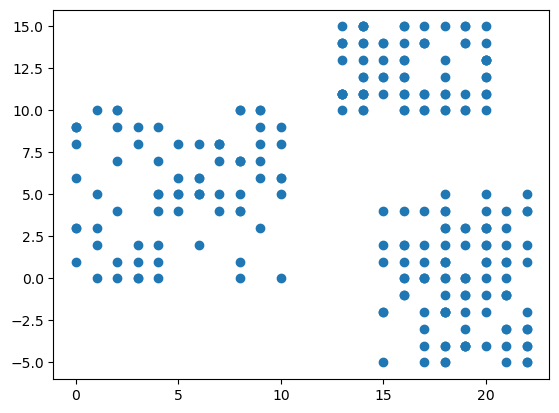

In [6]:
import wishart_lib
from random import randint
from matplotlib import pyplot as plt

def gen_rectangle(lx, rx, ly, ry):
    iters = randint(70, 100)

    res = []
    for i in range(iters):
        res.append([randint(lx, rx), randint(ly, ry)])

    return res

r1 = gen_rectangle(0, 10, 0, 10)
r2 = gen_rectangle(13, 20, 10, 15)
r3 = gen_rectangle(15, 22, -5, 5)

data_set = np.array(r1 + r2 + r3)
xs = data_set[:,0]
ys = data_set[:,1]

plt.scatter(xs, ys)
plt.show()

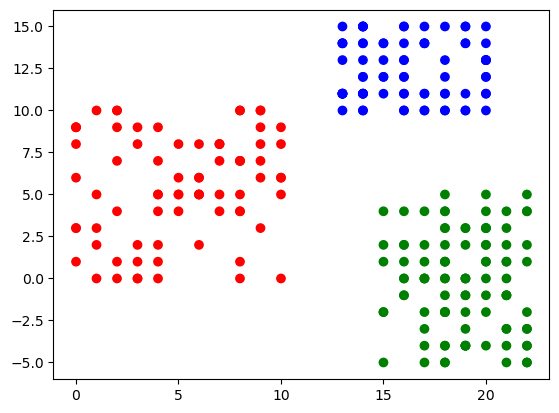

In [7]:
wishart = wishart_lib.Wishart(7, 1)
w = wishart.fit(data_set)

def compress(arr):
    was = dict()
    for i in range(len(arr)):
        if arr[i] not in was:
            was[arr[i]] = len(was)
        arr[i] = was[arr[i]]
    return arr

colour_pool = ['red', 'blue', 'green', 'yellow', 'brown', 'purple', 'orange']

w = compress(w)
colours = [colour_pool[i] for i in w]
plt.scatter(xs, ys, c=colours)
plt.show()



In [8]:
wishart = wishart_lib.Wishart(11, 10)
w = wishart.fit(data_set)
w = compress(w)
calculator = MeasureIndexes(data_set, w)

full_res = []
res = calculator.Calculate()
full_res.append(res)
for key in res:
    print(key, res[key])

RS 0.7728098730058468
G 246.5676247415367
CH 414.9951661814064
D 0.05716619504750295
S 0.5809925498308236
DB 0.5489143661888837
XB 0.11115190496612468


In [9]:
wishart = wishart_lib.Wishart(7, 10)
w = wishart.fit(data_set)
w = compress(w)
calculator = MeasureIndexes(data_set, w)

res = calculator.Calculate()
full_res.append(res)

for key in res:
    print(key, res[key])

RS 0.8219332394094254
G 258.85860578178244
CH 563.1362915536617
D 0.23505024736113425
S 0.6241175917869425
DB 0.5094077041957689
XB 0.0811614924692854


In [12]:
from indexes_lib import Tester

tester = Tester()

# test 1
wishart = wishart_lib.Wishart(7, 10)
w = wishart.fit(data_set)
w = compress(w)
tester.add_test(data_set, w)


# test 2
wishart = wishart_lib.Wishart(11, 5)
w = wishart.fit(data_set)
w = compress(w)
tester.add_test(data_set, w)


# test 3
wishart = wishart_lib.Wishart(15, 3)
w = wishart.fit(data_set)
w = compress(w)
tester.add_test(data_set, w)

tester.display()





  test id     RS        G       CH      D      S     DB     XB
---------  -----  -------  -------  -----  -----  -----  -----
        1  0.822  258.859  563.136  0.235  0.624  0.509  0.081
        2  0.773  246.568  414.995  0.057  0.581  0.549  0.111
        3  0.466  166.029  106.628  0.041  0.459  1.157  1.075
